# Introduction
Welcome to the TaskRabbit data analysis exercise. 

We appreciate your time and effort in completing this exercise. 

It helps TaskRabbit focus on candidates who are the best fit for the Data Analyst role, and also helps the candidate get an idea of the type of data we work with and the technical skills required to be successful in the role.

For this exercise, a sample data file is provided which contains information about "recommendations". 

A "recommendation" is the group of Taskers from which the Client can choose one to book.

The sample data file is a CSV file of the form:

## Data Information

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read in data
df = pd.read_csv("TaskRabbit-sample-data.csv", parse_dates = [1])
df.head()

,recommendation_id,created_at,tasker_id,position,hourly_rate,num_completed_tasks,hired,category
0,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,2017-09-01 00:32:00,1009185352,1,38,151,0,Furniture Assembly
1,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,2017-09-01 00:32:00,1006892359,2,40,193,0,Furniture Assembly
2,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,2017-09-01 00:32:00,1012023956,3,28,0,0,Furniture Assembly
3,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,2017-09-01 00:32:00,1009733517,4,43,303,0,Furniture Assembly
4,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,2017-09-01 00:32:00,1013579273,5,29,39,0,Furniture Assembly


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   recommendation_id    30000 non-null  object        
 1   created_at           30000 non-null  datetime64[ns]
 2   tasker_id            30000 non-null  int64         
 3   position             30000 non-null  int64         
 4   hourly_rate          30000 non-null  int64         
 5   num_completed_tasks  30000 non-null  int64         
 6   hired                30000 non-null  int64         
 7   category             30000 non-null  object        
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 1.8+ MB


## Column Information
The columns are as follows:
1. `recommendation_id`: unique identifier for this recommendation, or set of taskers shown
2. `created_at`: when this recommendation was shown to the client
3. `tasker_id`: unique identifier for the Tasker
4. `position`: the position of the Tasker in the recommendation set, 1 - first, 2 - second, etc.
5. `hourly_rate`: the hourly rate for the Tasker when they were shown
6. `num_completed_tasks`: the number of Tasks the Tasker had completed in that category, when they were shown 
7. `hired`: was the Tasker hired or not? Only 1 tasker out of a set of recommendations can be hired
8. `category`: the category of work the Client needs help with

# Question 1
How many recommendation sets are in this data sample?

In [4]:
df.shape

(30000, 8)

There are 30,000 recommendation sets in this sample.

# Question 2
Each recommendation set shows from 1 to 15 Taskers, what is...
- average number of Taskers shown
- median number of Taskers shown

In [5]:
(df["position"].mean(), df["position"].median())

(7.8736, 8.0)

The average number of Taskers shown is 7.87.

The median nunber of Taskers shown is 8.0.

# Question 3 
If we define the "booking rate" as the number of hires divided by number of tasker displayed, what the distribution of booking rate by position for each category? i.e
```
booking_rate  position       category
     0.7          1      Furniture Assembly
     0.5          2      Furniture Assembly
     ...         ...           ...
```

In [6]:
# add colums 'day' and 'hour'
df["day"] = df.created_at.dt.day
df["hour"] = df.created_at.dt.hour
df.head()

,recommendation_id,created_at,tasker_id,position,hourly_rate,num_completed_tasks,hired,category,day,hour
0,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,2017-09-01 00:32:00,1009185352,1,38,151,0,Furniture Assembly,1,0
1,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,2017-09-01 00:32:00,1006892359,2,40,193,0,Furniture Assembly,1,0
2,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,2017-09-01 00:32:00,1012023956,3,28,0,0,Furniture Assembly,1,0
3,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,2017-09-01 00:32:00,1009733517,4,43,303,0,Furniture Assembly,1,0
4,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,2017-09-01 00:32:00,1013579273,5,29,39,0,Furniture Assembly,1,0


In [7]:
# group by position and category
df_pos_cat = df.groupby(["position", "category"])
booking_rate_s = df_pos_cat.hired.sum()/df_pos_cat.hired.count()
booking_rate_df = booking_rate_s.to_frame(name = "booking_rate")
booking_rate_df

booking_rate
position category                        
1        Furniture Assembly      0.333809
         Mounting                0.283688
         Moving Help             0.276012
2        Furniture Assembly      0.144509
         Mounting                0.098712
         Moving Help             0.114162
3        Furniture Assembly      0.010174
         Mounting                0.032023
         Moving Help             0.050946
4        Furniture Assembly      0.093431
         Mounting                0.075802
         Moving Help             0.089181
5        Furniture Assembly      0.042647
         Mounting                0.063235
         Moving Help             0.073206
6        Furniture Assembly      0.040000
         Mounting                0.034175
         Moving Help             0.033824
7        Furniture Assembly      0.038981
         Mounting                0.028486
         Moving Help             0.051929
8        Furniture Assembly      0.019578
         Mounting                0.024024
         Moving Help             0.029806
9        Furniture Assembly      0.031770
         Mounting                0.033486
         Moving Help             0.017991
10       Furniture Assembly      0.027356
         Mounting                0.033588
         Moving Help             0.027190
11       Furniture Assembly      0.026074
         Mounting                0.020000
         Moving Help             0.016768
12       Furniture Assembly      0.012365
         Mounting                0.032407
         Moving Help             0.026114
13       Furniture Assembly      0.004644
         Mounting                0.031008
         Moving Help             0.009331
14       Furniture Assembly      0.006231
         Mounting                0.024961
         Moving Help             0.015798
15       Furniture Assembly      0.001558
         Mounting                0.006240
         Moving Help             0.004800

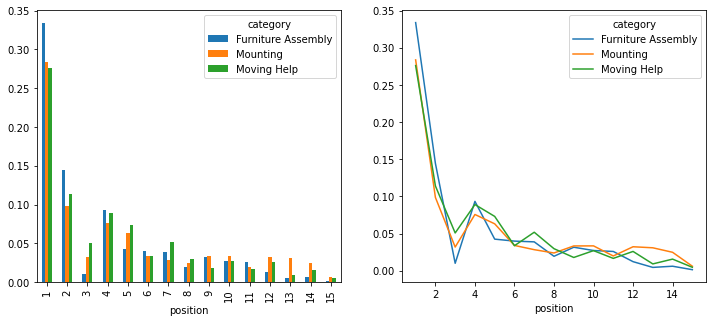

In [8]:
fig, axes = plt.subplots(1, 2, figsize = (12, 5))
df3 = booking_rate_df.unstack(level = 'category')
df3.columns = df3.columns.droplevel()
df3.plot(kind = "bar", ax = axes[0])
df3.plot(kind = "line", ax = axes[1])
plt.show()

## Why position 3 has a sudden drop?

In [9]:
# booking rate := # hires / # tasker displayed
# hourly rate per tasker := total hourly rate / # tasker displayed
# number of completed tasks per tasker := total number of completed tasks / # tasker displayed
df_pos = df[["position", "hourly_rate", "num_completed_tasks", "hired"]]
# df_pos = df_pos[df_pos["hired"] == 1] 
df_pos_per_tasker = df_pos.groupby("position").sum()/df_pos.hired.count()
df_pos_per_tasker

,hourly_rate,num_completed_tasks,hired
position,,,
1,3.180867,15.595433,0.020833
2,3.458467,15.073933,0.008267
3,3.333033,4.845800,0.002133
4,3.706033,15.282733,0.005900
5,3.739833,16.498733,0.004067
6,3.908933,16.845467,0.002433
7,3.912667,16.594900,0.002667
8,3.996900,17.233233,0.001633
9,4.050933,16.321367,0.001833


In [10]:
df_pos_day_hour = df[["position", "day", "hour", "hired"]]
df_pos_day_hour = df_pos_day_hour[df_pos_day_hour["hired"] == 1]
df_pos_day_hour_median = df_pos_day_hour.groupby("position").median()

In [11]:
df_pos_day_hour

,position,day,hour,hired
12,13,1,0,1
24,10,1,0,1
32,3,1,0,1
48,4,1,0,1
81,11,1,1,1
...,...,...,...,...
29932,1,30,22,1
29951,5,30,22,1
29962,1,30,22,1
29986,10,30,23,1


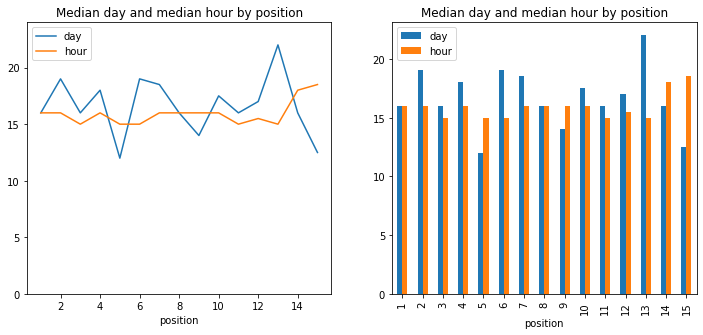

In [12]:
fig, axes = plt.subplots(1, 2, figsize = (12, 5))
df_pos_day_hour_median[["day", "hour"]].plot(ax = axes[0])
df_pos_day_hour_median[["day", "hour"]].plot(kind = "bar", ax = axes[1])
axes[0].set_title("Median day and median hour by position")
axes[0].set_ylim(0, 24)
axes[1].set_title("Median day and median hour by position")
plt.show()

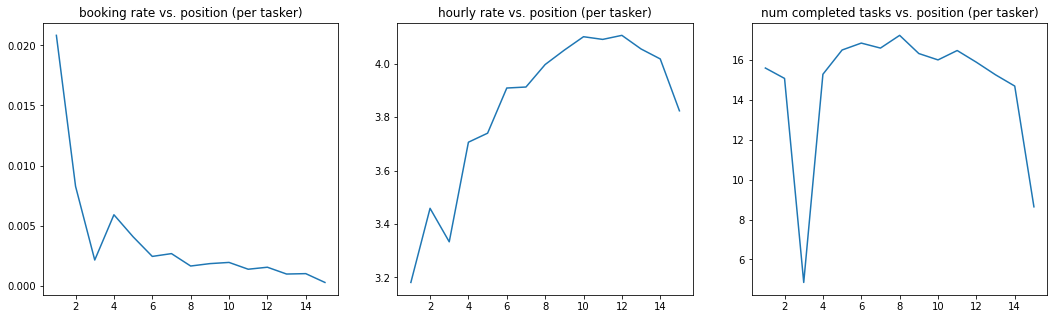

In [13]:
fig, ax = plt.subplots(1, 3, figsize = (18, 5))
# booking rate
ax[0].plot(df_pos_per_tasker["hired"])
ax[0].set_title("booking rate vs. position (per tasker)")
# hourly rate per tasker
ax[1].plot(df_pos_per_tasker["hourly_rate"])
ax[1].set_title("hourly rate vs. position (per tasker)")
# num of tasks per tasker
ax[2].plot(df_pos_per_tasker["num_completed_tasks"])
ax[2].set_title("num completed tasks vs. position (per tasker)")
plt.show()

## Heatmap of booking rate vs. position and num_completed_tasks

In [14]:
bins1 = list(range(0, 1500, 100))
groups1 = df.groupby(['position', pd.cut(df.num_completed_tasks, bins1)])
booking_rate_mx1 = groups1.hired.sum()/groups1.hired.count()
booking_rate_mx1 = booking_rate_mx1.unstack()
booking_rate_mx1 

num_completed_tasks,"(0, 100]","(100, 200]","(200, 300]","(300, 400]","(400, 500]","(500, 600]","(600, 700]","(700, 800]","(800, 900]","(900, 1000]","(1000, 1100]","(1100, 1200]","(1200, 1300]","(1300, 1400]"
position,,,,,,,,,,,,,,
1,0.366771,0.232026,0.294118,0.355372,0.326531,0.323529,0.428571,0.186047,0.333333,0.274194,0.125000,0.583333,NaN,NaN
2,0.121891,0.110320,0.115044,0.120968,0.112360,0.152778,0.242424,0.063830,0.200000,0.105263,0.125000,0.000000,0.000000,NaN
3,0.055652,0.021739,0.065789,0.130435,0.047619,0.090909,0.222222,0.266667,0.043478,0.714286,0.105263,0.000000,0.000000,NaN
4,0.079422,0.046908,0.071146,0.140845,0.069767,0.142857,0.217391,0.343750,0.121951,0.235294,0.095238,0.222222,0.000000,0.000000
5,0.055886,0.034483,0.057348,0.047619,0.065789,0.038462,0.152174,0.020833,0.258621,0.214286,0.049180,0.181818,0.000000,0.000000
6,0.034351,0.020115,0.012862,0.029197,0.048544,0.069307,0.022222,0.102564,0.085106,0.230769,0.078431,0.181818,0.071429,0.000000
7,0.043849,0.028986,0.034091,0.029940,0.042254,0.043478,0.017241,0.020000,0.085714,0.157895,0.068966,0.181818,0.000000,0.000000
8,0.021640,0.021978,0.009302,0.019108,0.053763,0.010870,0.021739,0.021739,0.075472,0.064516,0.017544,0.285714,0.071429,NaN
9,0.025913,0.027211,0.012821,0.048485,0.065421,0.030303,0.000000,0.028169,0.048780,0.000000,0.000000,0.076923,0.000000,0.000000


In [15]:
bins2 = list(range(0, 200, 20))
groups2 = df.groupby(['position', pd.cut(df.hourly_rate, bins2)])
booking_rate_mx2 = groups2.hired.sum()/groups2.hired.count()
booking_rate_mx2 = booking_rate_mx2.unstack()
booking_rate_mx2 

hourly_rate,"(0, 20]","(20, 40]","(40, 60]","(60, 80]","(80, 100]","(100, 120]","(120, 140]","(140, 160]","(160, 180]"
position,,,,,,,,,
1,0.00,0.291480,0.298839,0.342657,0.352941,NaN,NaN,0.000000,0.200000
2,NaN,0.123810,0.112745,0.148472,0.080645,0.500000,0.100000,0.000000,0.000000
3,0.00,0.016229,0.021084,0.116751,0.078014,0.125000,0.000000,0.000000,0.000000
4,0.25,0.087613,0.090462,0.051613,0.115385,0.142857,0.222222,0.000000,0.000000
5,0.60,0.052227,0.055444,0.094488,0.067901,0.214286,0.120000,0.000000,0.041667
6,0.00,0.042623,0.029762,0.046729,0.055901,0.000000,0.055556,0.083333,0.000000
7,1.00,0.039246,0.033508,0.056075,0.051948,0.238095,0.000000,0.066667,0.022222
8,NaN,0.026562,0.020474,0.009709,0.013793,0.272727,0.000000,0.054054,0.054054
9,0.00,0.027375,0.033917,0.015748,0.009434,0.166667,0.000000,0.020833,0.000000


In [84]:
bins1 = list(range(0, 1500, 100))
bins2 = list(range(0, 200, 20))
groups3 = df.groupby([pd.cut(df.num_completed_tasks, bins1), pd.cut(df.hourly_rate, bins2)])
booking_rate_mx3 = groups3.hired.sum()/groups3.hired.count()
booking_rate_mx3 = booking_rate_mx3.unstack()
booking_rate_mx3

hourly_rate,"(0, 20]","(20, 40]","(40, 60]","(60, 80]","(80, 100]","(100, 120]","(120, 140]","(140, 160]","(160, 180]"
num_completed_tasks,,,,,,,,,
"(0, 100]",0.092593,0.063002,0.037944,0.056955,0.030488,0.142857,0.000000,0.008264,0.000000
"(100, 200]",NaN,0.068311,0.065848,0.063087,0.084507,0.000000,0.010101,0.016260,0.000000
"(200, 300]",NaN,0.049123,0.083427,0.033613,0.050147,0.000000,NaN,0.000000,0.000000
"(300, 400]",NaN,0.090909,0.086512,0.000000,0.060241,0.000000,0.034483,0.000000,0.000000
"(400, 500]",NaN,0.066860,0.079046,0.145631,0.032258,0.037037,0.041667,0.000000,NaN
"(500, 600]",NaN,0.076923,0.074839,0.027027,0.000000,NaN,NaN,NaN,NaN
"(600, 700]",NaN,0.000000,0.060976,0.194030,0.061538,0.000000,0.062500,NaN,0.000000
"(700, 800]",NaN,0.057143,0.060440,0.047619,0.000000,NaN,0.000000,NaN,NaN
"(800, 900]",NaN,0.000000,0.084746,0.240000,0.119718,0.119048,0.039216,0.000000,NaN


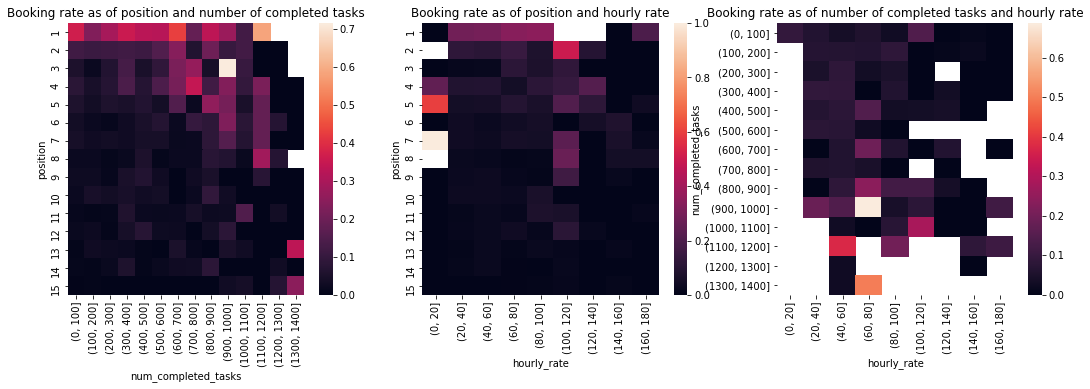

In [85]:
fig, axes = plt.subplots(1, 3, figsize = (18, 5))
sns.heatmap(booking_rate_mx1, ax = axes[0])
sns.heatmap(booking_rate_mx2, ax = axes[1])
sns.heatmap(booking_rate_mx3, ax = axes[2])
axes[0].set_title("Booking rate as of position and number of completed tasks")
axes[1].set_title("Booking rate as of position and hourly rate")
axes[2].set_title("Booking rate as of number of completed tasks and hourly rate")
plt.show()

## Question 3 Analysis

1. Regardless of the category, the booking rate generally decreases as the tasker's position grows higher. Taskers at position 1 has the highest booking rate and taskers at position 15 has the lowest booking rate. 

2. There is a sharp decrease of the booking rate from position 1 to 3-4. Then the speed of the decreasing trend becomes much slower from position 4 to 15.

3. Roughly from position 1 to 3, "Furniture Assembly" tends to have the highest booking rate. Then from position 5 to 8, "Moving Help" tends to have the highest booking rate. Finally from position 9 to 15, "Mounting" tends to the the highest booking rate among the three categories. 

### Regarding the sudden drop of booking rate at position 3
I ploted the median day and median hour for each position but did not observe obvious trends. The median hour fluctuates between 15 and 20. The median day flucturates between 10 and 20. 


Since booking rate is defined as: # taskers hired / # taskers displayed, I define two more rates following the same logic:
- sum of hourly rate / # taskers displayed
- sum of number of completed tasks / # taskers displayed


Based on the plots above, I noticed there is also a sudden drop of `number of completed tasks per tasker` at position 3. Whereas the `hourly rate` vs. `position` follows an oppotisite trend as `booking rate` vs. `position`. This makes sense since higher hourly rate generally leads to lower booking rate. One possible explanation for the sudden drop at position 3 could be the unusually low number of completed tasks undermines customers' trust in taskers at position 3. 

Based on the heatmap of `booking rate` vs. `hourly rate`, `num completed tasks`, and `postion`, I did not notice significant collinearity issues. Therefore, I decide to keep all the predictors in the following modeling section. 

# Question 4
For each category, what is the average position of the Tasker who is hired?

In [17]:
df4 = df[df["hired"] == 1].groupby("category").position.mean()
df4

category
Furniture Assembly    3.611888
Mounting              4.596085
Moving Help           4.145359
Name: position, dtype: float64

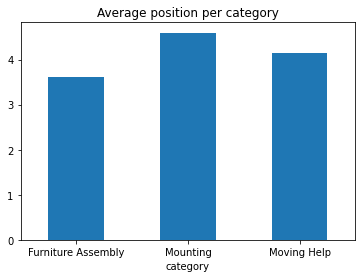

In [18]:
df4.plot(kind = "bar", title = "Average position per category")
plt.xticks(rotation = 0);

In [19]:
# df_pos = df[["position", "category", "hourly_rate", "num_completed_tasks", "day", "hour", "hired"]]
df_hired = df[df["hired"] == 1]
df_cat = df_hired[["position", "category"]]
df_cat_qt = df_cat.groupby("category").quantile(q = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
df_cat_qt = df_cat_qt.unstack("category")
df_cat_qt.columns = ["Furniture Assembly", "Mounting", "Moving Help"]
df_cat_qt

,Furniture Assembly,Mounting,Moving Help
0.1,1.0,1.0,1.0
0.2,1.0,1.0,1.0
0.3,1.0,1.0,1.0
0.4,1.0,2.0,2.0
0.5,2.0,3.0,3.0
0.6,4.0,4.0,4.0
0.7,4.0,6.0,5.0
0.8,6.0,9.0,7.0
0.9,9.0,12.0,10.0


In [20]:
df_cat

,position,category
12,13,Furniture Assembly
24,10,Furniture Assembly
32,3,Moving Help
48,4,Moving Help
81,11,Furniture Assembly
...,...,...
29932,1,Furniture Assembly
29951,5,Moving Help
29962,1,Furniture Assembly
29986,10,Mounting


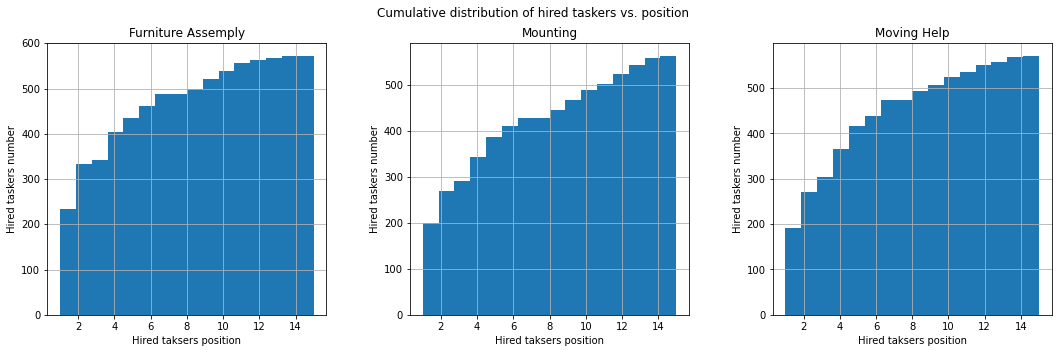

In [21]:
fig, axes = plt.subplots(1, 3, figsize = (18, 5))
df_cat[df_cat.category =="Furniture Assembly"].hist(cumulative = True, bins = 16, ax = axes[0])
df_cat[df_cat.category =="Mounting"].hist(cumulative = True, bins = 16, ax = axes[1])
df_cat[df_cat.category =="Moving Help"].hist(cumulative = True, bins = 16, ax = axes[2])

fig.suptitle("Cumulative distribution of hired taskers vs. position")
axes[0].set_title("Furniture Assemply")
axes[1].set_title("Mounting")
axes[2].set_title("Moving Help")

for i in range(3):  
    axes[i].set_ylabel("Hired taskers number")
    axes[i].set_xlabel("Hired taksers position")
plt.show()

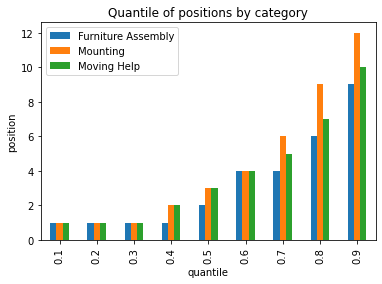

In [22]:
df_cat_qt.plot(kind = "bar", title = "Quantile of positions by category")
plt.xlabel("quantile")
plt.ylabel("position")
plt.show()

## Question 4 Analysis
1. The average positions for the hired taskers are around 3 to 4. "Mounting" has the highest average booking rate and "Furniture Assembly" has the lowest average booking rate. 

2. However, position 1 still has the highest proability to get hired becuase this is an average. Average can be misleading if the data distribution is skewed.

# Question 5
For each category, what is the average hourly rate and average number of completed tasks for the Taskers who are hired?

In [23]:
df5 = df[df["hired"] == 1].groupby("category")[["hourly_rate", "num_completed_tasks"]].mean()
df5 = df5.transpose()
df5

category,Furniture Assembly,Mounting,Moving Help
hourly_rate,38.701049,50.154804,63.012259
num_completed_tasks,249.020979,284.096085,273.882662


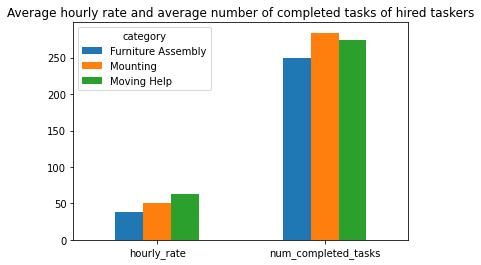

In [24]:
df5.plot(kind = "bar", title = "Average hourly rate and average number of completed tasks of hired taskers" )
plt.xticks(rotation=0)
plt.show()

## Question 5 Analysis
1. The average hourly rates for the Taskers who are hired are between 38 and 64. The average number of completed tasks for the Taskers who are hired are between 249 and 273.

2. "Furniture Assembly" has the lowest average hourly rate and the lowest averge number of completed tasks.

3. "Mounting" has the highest average number of completed tasks. "Moving Help" has the highest average hourly rate. 

# Question 6
For each category, what is the average hourly rate and average number of completed tasks the the Taskers who are not hired?

In [25]:
df6 = df[df["hired"] == 0].groupby("category")[["hourly_rate", "num_completed_tasks"]].mean()
df6 = df6.transpose()
df6

category,Furniture Assembly,Mounting,Moving Help
hourly_rate,39.463301,50.493961,83.736345
num_completed_tasks,182.000212,216.470227,256.616608


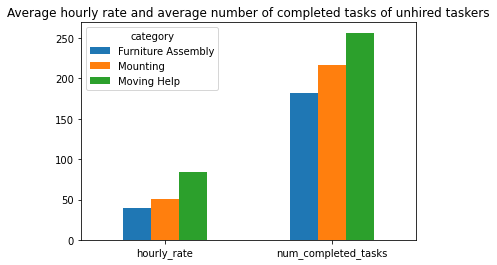

In [26]:
df6.plot(kind = "bar", title = "Average hourly rate and average number of completed tasks of unhired taskers")
plt.xticks(rotation=0)
plt.show()

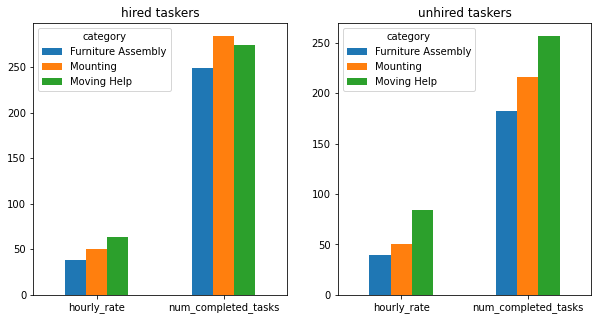

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (10, 5))
df5.plot(kind = "bar", title = "hired taskers" , ax = axes[0])
df6.plot(kind = "bar", title = "unhired taskers", ax = axes[1])
axes[0].tick_params(labelrotation = 0)
axes[1].tick_params(labelrotation = 0)
plt.show()

## Question 6 Analysis
1. The average hourly rates for the Taskers who are not hired are between 39 and 83 (which are higher than the hired Taskers). The average number of completed tasks for the Taskers who are hired are between 182 and 265 (which are lower than the hired Taskers).

2. "Furniture Assembly" has the lowest average hourly rate and the lowest averge number of completed tasks.

3. "Moving Help" has the highest average hourly rate and the highest averge number of completed tasks.

# Additional Comparasion between Hired and Not Hired

In [28]:
df7 = df.groupby(["hired", "category"])[["position", "hourly_rate", "num_completed_tasks"]].mean()
df8 = df7.unstack(level = "hired")
df9 = df.groupby(["hired", "category"])[["day", "hour"]].median()
df10 = df9.unstack(level = "hired")

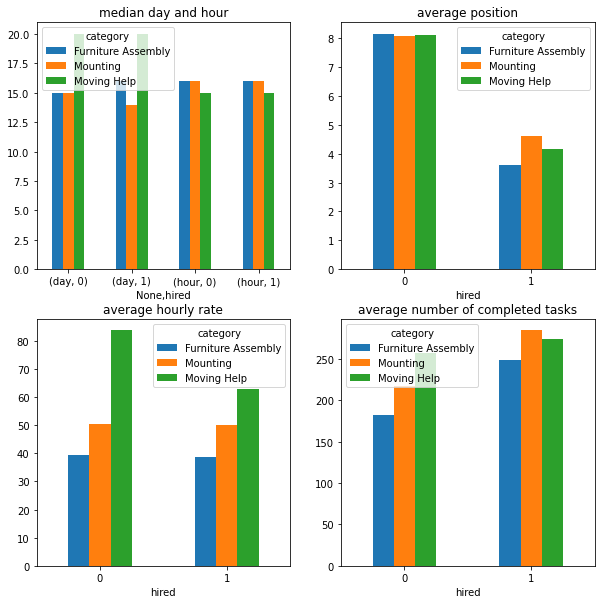

In [29]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (10,10))
df10[["day", "hour"]].transpose().plot(kind = "bar", ax = axes[0,0], title = "median day and hour")
df8["position"].transpose().plot(kind = "bar", ax = axes[0,1], title = "average position")
df8["hourly_rate"].transpose().plot(kind = "bar", ax = axes[1,0], title = "average hourly rate")
df8["num_completed_tasks"].transpose().plot(kind = "bar", ax = axes[1,1], title = "average number of completed tasks")
axes[0,0].tick_params(labelrotation = 0)
axes[1,0].tick_params(labelrotation = 0)
axes[0,1].tick_params(labelrotation = 0)
axes[1,1].tick_params(labelrotation = 0)
plt.show()

## Add buckets and scatter plot for hourly rate and scatter plot
- buckets for hourly rate and num tasks, hired percentage in that bucket.
- scatter plot of the hourly rate and num tasks, colored by hired or not hired.

In [30]:
hour_38_50 = df[(df["hourly_rate"] >= 38) & (df["hourly_rate"] <= 50)]
hour_38_50_hired_rate = hour_38_50["hired"].sum() / hour_38_50["hired"].count()

hour_51_100 = df[(df["hourly_rate"] >= 51) & (df["hourly_rate"] <= 100)]
hour_51_100_hired_rate = hour_51_100["hired"].sum() / hour_51_100["hired"].count()

hour_101_150 = df[(df["hourly_rate"] >= 101) & (df["hourly_rate"] <= 150)]
hour_101_150_hired_rate = hour_101_150["hired"].sum() / hour_101_150["hired"].count()

hour_151_200 = df[(df["hourly_rate"] >= 151) & (df["hourly_rate"] <= 200)]
hour_151_200_hired_rate = hour_151_200["hired"].sum() / hour_151_200["hired"].count()

In [31]:
task_0_300 = df[(df["num_completed_tasks"] >= 0) & (df["num_completed_tasks"] <= 300)]
task_0_300_hired_rate = task_0_300["hired"].sum() / task_0_300["hired"].count()

task_301_600 = df[(df["num_completed_tasks"] >= 301) & (df["num_completed_tasks"] <= 600)]
task_301_600_hired_rate = task_301_600["hired"].sum() / task_301_600["hired"].count()

task_601_900 = df[(df["num_completed_tasks"] >= 601) & (df["num_completed_tasks"] <= 900)]
task_601_900_hired_rate = task_601_900["hired"].sum() / task_601_900["hired"].count()

task_901_1200 = df[(df["num_completed_tasks"] >= 901) & (df["num_completed_tasks"] <= 1200)]
task_901_1200_hired_rate = task_901_1200["hired"].sum() / task_901_1200["hired"].count()

task_1201_1500 = df[(df["num_completed_tasks"] >= 1201) & (df["num_completed_tasks"] <= 1500)]
task_1201_1500_hired_rate = task_1201_1500["hired"].sum() / task_1201_1500["hired"].count()

In [32]:
hourly_bucket = ["38-50", "51-100", "101-150", "151-200"]
hired_rate_h = [hour_38_50_hired_rate, hour_51_100_hired_rate, hour_101_150_hired_rate, hour_151_200_hired_rate]
df_hourly = pd.DataFrame(hired_rate_h)
df_hourly.index = hourly_bucket
df_hourly.columns = ["hired_rate"]
df_hourly

,hired_rate
38-50,0.063753
51-100,0.055812
101-150,0.037008
151-200,0.006415


In [33]:
task_bucket = ["0-300", "301-600", "601-900", "901-1200", "1201-1500"]
hired_rate_t = [task_0_300_hired_rate, task_301_600_hired_rate, task_601_900_hired_rate, 
                task_901_1200_hired_rate, task_1201_1500_hired_rate]
df_task = pd.DataFrame(hired_rate_t)
df_task.index = task_bucket
df_task.columns = ["hired_rate"]
df_task

,hired_rate
0-300,0.051422
301-600,0.073027
601-900,0.071778
901-1200,0.086649
1201-1500,0.028070


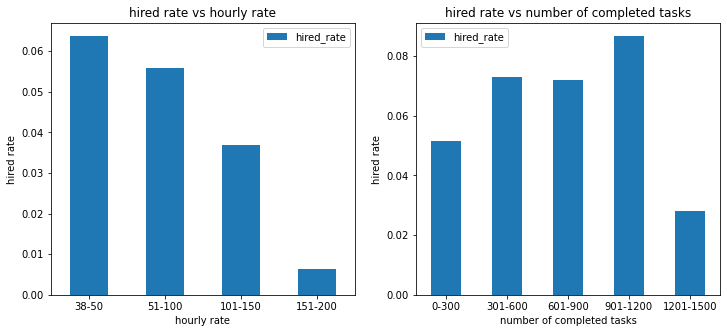

In [34]:
fig, axes = plt.subplots(1, 2, figsize = (12, 5))

df_hourly.plot(kind = "bar", title = "hired rate vs hourly rate", ax = axes[0])
axes[0].tick_params(labelrotation = 0)
axes[0].set_xlabel("hourly rate")
axes[0].set_ylabel("hired rate")

df_task.plot(kind = "bar", title = "hired rate vs number of completed tasks", ax = axes[1])
axes[1].tick_params(labelrotation = 0)
axes[1].set_xlabel("number of completed tasks")
axes[1].set_ylabel("hired rate")

plt.show()

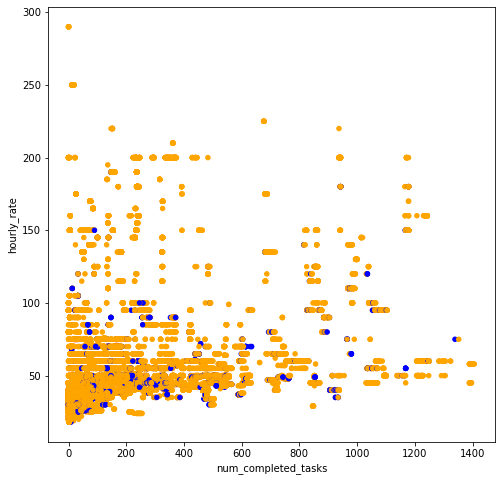

In [35]:
colors = {0 : "orange", 1 : "blue"}
df.plot.scatter(y = "hourly_rate", x = "num_completed_tasks",
                c = df["hired"].map(colors), figsize = (8, 8));

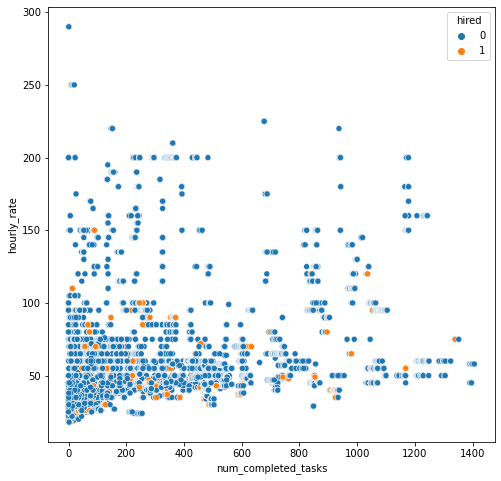

In [36]:
import seaborn as sns
plt.figure(figsize=(8,8))
sns.scatterplot(y = df['hourly_rate'], x = df['num_completed_tasks'], hue = df['hired'])
plt.show()

## Additional Comparasion

1. The hired Taskers tend to have lower positions than those who are not hired.

2. The hired Taskers tend to have lower hourly rates than those who are not hired.

3. The hired Taskers tend to have higher number of completed taskers than those who are not hired. 

# Question 7
(Bonus) What factors do impact a client choice to select a tasker ?

Feel free to build a predictive model to determine the factors.

classification problem, to predict "hired" - response

objective: tell what factors have an impact 

In [37]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# read in data
df = pd.read_csv("TaskRabbit-sample-data.csv", parse_dates = [1])

# convert 'created_at' to a date type object 
# df["created_at"] = pd.to_datetime(df["created_at"])
df.head()

,recommendation_id,created_at,tasker_id,position,hourly_rate,num_completed_tasks,hired,category
0,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,2017-09-01 00:32:00,1009185352,1,38,151,0,Furniture Assembly
1,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,2017-09-01 00:32:00,1006892359,2,40,193,0,Furniture Assembly
2,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,2017-09-01 00:32:00,1012023956,3,28,0,0,Furniture Assembly
3,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,2017-09-01 00:32:00,1009733517,4,43,303,0,Furniture Assembly
4,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,2017-09-01 00:32:00,1013579273,5,29,39,0,Furniture Assembly


In [38]:
df["day"] = df.created_at.dt.day
df["hour"] = df.created_at.dt.hour
df.head()

,recommendation_id,created_at,tasker_id,position,hourly_rate,num_completed_tasks,hired,category,day,hour
0,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,2017-09-01 00:32:00,1009185352,1,38,151,0,Furniture Assembly,1,0
1,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,2017-09-01 00:32:00,1006892359,2,40,193,0,Furniture Assembly,1,0
2,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,2017-09-01 00:32:00,1012023956,3,28,0,0,Furniture Assembly,1,0
3,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,2017-09-01 00:32:00,1009733517,4,43,303,0,Furniture Assembly,1,0
4,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,2017-09-01 00:32:00,1013579273,5,29,39,0,Furniture Assembly,1,0


In [39]:
to_drop = ["hired", "recommendation_id", "tasker_id", "created_at"]

y = df["hired"]
X = df.drop(to_drop, axis = 1)
X.head()

,position,hourly_rate,num_completed_tasks,category,day,hour
0,1,38,151,Furniture Assembly,1,0
1,2,40,193,Furniture Assembly,1,0
2,3,28,0,Furniture Assembly,1,0
3,4,43,303,Furniture Assembly,1,0
4,5,29,39,Furniture Assembly,1,0


In [40]:
X.dtypes

position                int64
hourly_rate             int64
num_completed_tasks     int64
category               object
day                     int64
hour                    int64
dtype: object

In [41]:
# check collinearity between numeric predictors
df[["position", "hourly_rate", "num_completed_tasks", "day", "hour"]].corr()

,position,hourly_rate,num_completed_tasks,day,hour
position,1.000000,0.140029,0.024309,0.002855,-0.004467
hourly_rate,0.140029,1.000000,0.287258,0.069686,-0.047935
num_completed_tasks,0.024309,0.287258,1.000000,-0.001026,-0.013893
day,0.002855,0.069686,-0.001026,1.000000,-0.053141
hour,-0.004467,-0.047935,-0.013893,-0.053141,1.000000


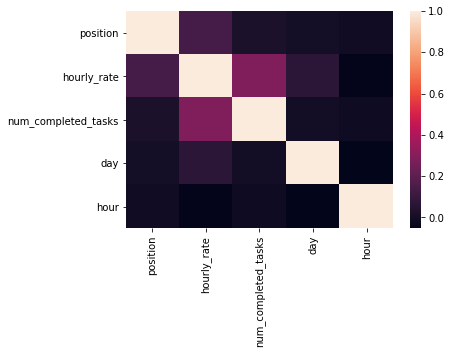

In [42]:
sns.heatmap(df[["position", "hourly_rate", "num_completed_tasks", "day", "hour"]].corr());

No significant indication of collinearity. Therefore we proceed without droping any predictors. 

If we are being really careful, the correlation between `hourly rate` and `num_completed_task` is 0.287, which can be called moderate.

In [43]:
cat_cols = X.columns[X.dtypes == 'O']
num_cols = X.columns[X.dtypes == 'int64']

In [44]:
cat_cols

Index(['category'], dtype='object')

In [45]:
num_cols

Index(['position', 'hourly_rate', 'num_completed_tasks', 'day', 'hour'], dtype='object')

In [46]:
len(df[df["hired"] == 1])

1705

In [47]:
len(df[df["hired"] == 0])

28295

In [48]:
# split into traning and testing
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.25, random_state = 561, stratify = y)

In [49]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)
print(len(y_train[y_train==0]), len(y_train[y_train==1]))

(22500, 6) (7500, 6)
(22500,) (7500,)
21221 1279


In [50]:
X_train.head()

,position,hourly_rate,num_completed_tasks,category,day,hour
4208,11,60,184,Mounting,6,4
18622,2,42,227,Furniture Assembly,20,20
21739,11,38,5,Mounting,23,22
27515,15,35,1,Mounting,28,21
290,10,180,172,Moving Help,1,14


In [51]:
X_test.head()

,position,hourly_rate,num_completed_tasks,category,day,hour
4037,5,100,220,Moving Help,6,0
21386,11,70,175,Furniture Assembly,23,16
21897,4,60,762,Mounting,24,0
8266,9,42,197,Furniture Assembly,10,0
1779,8,27,13,Furniture Assembly,2,22


In [52]:
# one hot encoding
from sklearn.preprocessing import OneHotEncoder

def OneHotEncoding(df, enc, categories):
    transformed = pd.DataFrame(enc.transform(df[categories]).toarray(),
                               columns = enc.get_feature_names(categories))
    return pd.concat([df.reset_index(drop = True), transformed], axis = 1).drop(categories, axis = 1)

categories = ["category"]
enc_ohe = OneHotEncoder()
enc_ohe.fit(X_train[categories])

X_train = OneHotEncoding(X_train, enc_ohe, categories)
X_test = OneHotEncoding(X_test, enc_ohe, categories)

In [53]:
X_train.head()

,position,hourly_rate,num_completed_tasks,day,hour,category_Furniture Assembly,category_Mounting,category_Moving Help
0,11,60,184,6,4,0.0,1.0,0.0
1,2,42,227,20,20,1.0,0.0,0.0
2,11,38,5,23,22,0.0,1.0,0.0
3,15,35,1,28,21,0.0,1.0,0.0
4,10,180,172,1,14,0.0,0.0,1.0


In [54]:
y_train.head()

4208     0
18622    1
21739    0
27515    0
290      0
Name: hired, dtype: int64

In [55]:
# standardization
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(X_train[num_cols])
# X_train[num_cols] = scaler.transform(X_train[num_cols])
# X_test[num_cols] = scaler.transform(X_test[num_cols])

In [56]:
X_train.head()

,position,hourly_rate,num_completed_tasks,day,hour,category_Furniture Assembly,category_Mounting,category_Moving Help
0,11,60,184,6,4,0.0,1.0,0.0
1,2,42,227,20,20,1.0,0.0,0.0
2,11,38,5,23,22,0.0,1.0,0.0
3,15,35,1,28,21,0.0,1.0,0.0
4,10,180,172,1,14,0.0,0.0,1.0


In [57]:
# logistic regression
from sklearn.linear_model import LogisticRegression

classifier_LR = LogisticRegression()

In [58]:
# convert date variables into categories 
# month of the year, day of the week, morning or night

In [59]:
# train the model
# classifier_LR.fit(X_train.iloc[:,1:3], y_train)
classifier_LR.fit(X_train, y_train)

C:\Users\lilym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [60]:
# predict the test data
classifier_LR.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [61]:
# accuracy of test data
classifier_LR.score(X_test, y_test) # accuracy 

0.9432

In [62]:
y_test.shape

(7500,)

In [63]:
# roc_auc of test data
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, classifier_LR.predict_proba(X_test)[:, 1])

0.7794052743565341

In [64]:
classifier_LR.predict_proba(X_test)

array([[0.94390266, 0.05609734],
       [0.98821172, 0.01178828],
       [0.85911818, 0.14088182],
       ...,
       [0.98429836, 0.01570164],
       [0.96927536, 0.03072464],
       [0.98363148, 0.01636852]])

In [65]:
classifier_LR.predict_proba(X_test)[:, 1]

array([0.05609734, 0.01178828, 0.14088182, ..., 0.01570164, 0.03072464,
       0.01636852])

In [66]:
# todo: specify the metric as AUC score, not accuracy 
# use grid search to find the optimal hyperparameter
from sklearn.model_selection import GridSearchCV
parameters = {
    "penalty" : ("l1", "l2"),
    "C" : (0.005, 0.01, 0.05, 0.1)
}
grid_LR = GridSearchCV(LogisticRegression(solver = "liblinear"), 
                       parameters, cv = 5, scoring = 'roc_auc')
grid_LR.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': (0.005, 0.01, 0.05, 0.1),
                         'penalty': ('l1', 'l2')},
             scoring='roc_auc')

In [67]:
(grid_LR.best_score_, grid_LR.best_params_)

(0.77428991799508, {'C': 0.1, 'penalty': 'l2'})

In [68]:
# best model
best_LR_model = grid_LR.best_estimator_
best_LR_model.predict(X_test)
best_LR_model.score(X_test, y_test)

0.9432

In [69]:
roc_auc_score(y_test, best_LR_model.predict_proba(X_test)[:, 1])

0.7793017410845243

In [70]:
# model evalution 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_LR_model.predict(X_test))
cm

array([[7074,    0],
       [ 426,    0]], dtype=int64)

In [71]:
tn = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]
tp = cm[1][1]
accuracy = (tp + tn) / (tp + fp + fn + tn + 0.0)
precision = tp / (tp + fp + 0.0)
recall = tp / (tp + fn + 0.0)
f1 = 2 * precision * recall / (precision + recall)

<ipython-input-71-344bb3b0d023>:6: RuntimeWarning: invalid value encountered in true_divide
  precision = tp / (tp + fp + 0.0)


In [72]:
(accuracy, precision, recall, f1)

(0.9432, nan, 0.0, nan)

In [73]:
fitted = best_LR_model.fit(X_train, y_train)

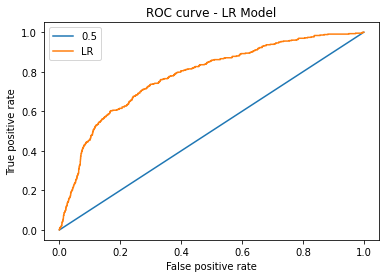

In [74]:
# ROC curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_pred_lr = fitted.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, thresh = roc_curve(y_test, y_pred_lr)

plt.figure(1)
plt.plot([0, 1], [0, 1], label = "0.5")
plt.plot(fpr_lr, tpr_lr, label = 'LR')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve - LR Model")
plt.legend(loc = 'best')
plt.show()

In [75]:
y_pred_lr

array([0.05781217, 0.01148362, 0.14227323, ..., 0.01559481, 0.03160566,
       0.01631132])

In [76]:
(y_test == 0).sum(), (y_test == 1).sum()

(7074, 426)

In [77]:
# AUC score
from sklearn import metrics
metrics.auc(fpr_lr, tpr_lr)

0.7793017410845243

In [78]:
# feature importance 
print(best_LR_model.coef_)
type(best_LR_model.coef_)

[[-0.26392325 -0.00801938  0.00104776  0.00128793 -0.00273227 -0.37085942
  -0.29980685 -0.11850982]]


numpy.ndarray

In [79]:
coef_df = pd.DataFrame(best_LR_model.coef_)

In [80]:
coef_df.columns = X_train.columns
coef_df.index = ["coefficient"]

In [81]:
coef_df

,position,hourly_rate,num_completed_tasks,day,hour,category_Furniture Assembly,category_Mounting,category_Moving Help
coefficient,-0.263923,-0.008019,0.001048,0.001288,-0.002732,-0.370859,-0.299807,-0.11851


In [82]:
coef_df.transpose().sort_values(by = "coefficient")

,coefficient
category_Furniture Assembly,-0.370859
category_Mounting,-0.299807
position,-0.263923
category_Moving Help,-0.118510
hourly_rate,-0.008019
hour,-0.002732
num_completed_tasks,0.001048
day,0.001288


## Answer to question 7: 
The feature importance are listed above from high to low.

## Q7: Attempt to drop `position`

In [86]:
df.head()

,recommendation_id,created_at,tasker_id,position,hourly_rate,num_completed_tasks,hired,category,day,hour
0,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,2017-09-01 00:32:00,1009185352,1,38,151,0,Furniture Assembly,1,0
1,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,2017-09-01 00:32:00,1006892359,2,40,193,0,Furniture Assembly,1,0
2,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,2017-09-01 00:32:00,1012023956,3,28,0,0,Furniture Assembly,1,0
3,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,2017-09-01 00:32:00,1009733517,4,43,303,0,Furniture Assembly,1,0
4,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,2017-09-01 00:32:00,1013579273,5,29,39,0,Furniture Assembly,1,0


In [88]:
to_drop = ["position", "hired", "recommendation_id", "tasker_id", "created_at"]

y = df["hired"]
X = df.drop(to_drop, axis = 1)
X.head()

,hourly_rate,num_completed_tasks,category,day,hour
0,38,151,Furniture Assembly,1,0
1,40,193,Furniture Assembly,1,0
2,28,0,Furniture Assembly,1,0
3,43,303,Furniture Assembly,1,0
4,29,39,Furniture Assembly,1,0


In [89]:
# split into traning and testing
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.25, random_state = 561, stratify = y)

In [90]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)
print(len(y_train[y_train==0]), len(y_train[y_train==1]))

(22500, 5) (7500, 5)
(22500,) (7500,)
21221 1279


In [91]:
X_train.head()

,hourly_rate,num_completed_tasks,category,day,hour
4208,60,184,Mounting,6,4
18622,42,227,Furniture Assembly,20,20
21739,38,5,Mounting,23,22
27515,35,1,Mounting,28,21
290,180,172,Moving Help,1,14


In [92]:
X_test.head()

,hourly_rate,num_completed_tasks,category,day,hour
4037,100,220,Moving Help,6,0
21386,70,175,Furniture Assembly,23,16
21897,60,762,Mounting,24,0
8266,42,197,Furniture Assembly,10,0
1779,27,13,Furniture Assembly,2,22


In [96]:
# one hot encoding
from sklearn.preprocessing import OneHotEncoder

def OneHotEncoding(df, enc, categories):
    transformed = pd.DataFrame(enc.transform(df[categories]).toarray(),
                               columns = enc.get_feature_names(categories))
    return pd.concat([df.reset_index(drop = True), transformed], axis = 1).drop(categories, axis = 1)

categories = ["category"]
enc_ohe = OneHotEncoder()
enc_ohe.fit(X_train[categories])

X_train = OneHotEncoding(X_train, enc_ohe, categories)
X_test = OneHotEncoding(X_test, enc_ohe, categories)

In [102]:
X_train.head()

,hourly_rate,num_completed_tasks,day,hour,category_Furniture Assembly,category_Mounting,category_Moving Help
0,60,184,6,4,0.0,1.0,0.0
1,42,227,20,20,1.0,0.0,0.0
2,38,5,23,22,0.0,1.0,0.0
3,35,1,28,21,0.0,1.0,0.0
4,180,172,1,14,0.0,0.0,1.0


In [103]:
y_train.head()

4208     0
18622    1
21739    0
27515    0
290      0
Name: hired, dtype: int64

In [97]:
# logistic regression
from sklearn.linear_model import LogisticRegression

classifier_LR = LogisticRegression()

In [98]:
# train the model
# classifier_LR.fit(X_train.iloc[:,1:3], y_train)
classifier_LR.fit(X_train, y_train)

LogisticRegression()

In [99]:
# predict the test data
classifier_LR.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [100]:
# accuracy of test data
classifier_LR.score(X_test, y_test) # accuracy 

0.9432

In [101]:
# roc_auc of test data
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, classifier_LR.predict_proba(X_test)[:, 1])

0.5835780634234204

In [108]:
# use grid search to find the optimal hyperparameter
from sklearn.model_selection import GridSearchCV
parameters = {
    "penalty" : ("l1", "l2"),
    "C" : (0.05, 0.1, 0.2, 0.5)
}
grid_LR = GridSearchCV(LogisticRegression(solver = "liblinear"), 
                       parameters, cv = 5, scoring = 'roc_auc')
grid_LR.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': (0.05, 0.1, 0.2, 0.5), 'penalty': ('l1', 'l2')},
             scoring='roc_auc')

In [109]:
(grid_LR.best_score_, grid_LR.best_params_)

(0.6029478548560664, {'C': 0.5, 'penalty': 'l2'})

In [110]:
# best model
best_LR_model = grid_LR.best_estimator_
best_LR_model.predict(X_test)
best_LR_model.score(X_test, y_test)

0.9432

In [111]:
roc_auc_score(y_test, best_LR_model.predict_proba(X_test)[:, 1])

0.583247553362774

In [112]:
fitted = best_LR_model.fit(X_train, y_train)

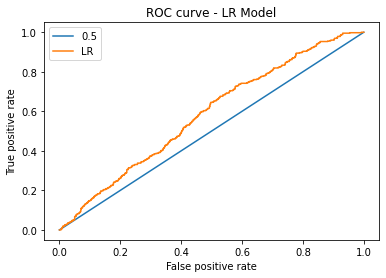

In [113]:
# ROC curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_pred_lr = fitted.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, thresh = roc_curve(y_test, y_pred_lr)

plt.figure(1)
plt.plot([0, 1], [0, 1], label = "0.5")
plt.plot(fpr_lr, tpr_lr, label = 'LR')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve - LR Model")
plt.legend(loc = 'best')
plt.show()

## Attempt to drop `position` conclusion:

Dropping `position` seems to make the AUC score drop 0.78 from 0.58, so I'm not sure if it is a good idea?

## Suggestions to Task Rabbit: 

To improve our customer base and make our taskers happy, I will focus on improving the users' decision-making / hiring process and improving the taskers' chances of getting hired. 


**1. I would suggest Task Rabbit redefine/regroup existing 16 positions into 6 positions (an approximate).** 

I noticed that the hire rate drops dramatically since position 4-5. More than 60% of the hired taskers are at a position below 6. In addition, the logistic regression model also indicate position has a negative impact on the hire rate. Perhaps we can group the current position 1-3 into a new position A, the current position 4-6 into a new position B, so on and so forth. The logic behind reducing position options is to avoid choice overload: it's harder for people to make decisions when there are too many options. By redefining/ regrouping position numbers, we can save our customer's time and effort to make choices and improve their likelihood to hire a tasker in return. 


**2. I would suggest Task Rabbit help the tasker achieve higher number of completed tasks.**


I noticed that customers perfer to hire taskers with higher number of completed tasks and lower hourly rate. A tasker's hourly rate increases as one's number of completed tasks increase. The higher number of completed tasks a tasker has, the more likely one is going to be hired. However, the higher hourly rate a tasker has, the less likely one is going to be hired.  

For example, make arrangements with the new taskers with a few tasks completed. Perhaps tempararily lower their hourly rate to increase their chances of geting hired and completing more tasks. With a higher number of completed tasks, they are more likely to get hired the next time. After they have reached a certain level of completed tasks, they can raise their hourly rate.

Another suggestion could be to offer discounts to the users if they choose hire a tasker with a low number of completed tasks. This will provide the customers incentives to hire the taskers with a low number of completed tasks and help these taskers to achieve a higher number of completed tasks. In the long run, these taskers will have a higher chance of getting hired if they can acccumulate more completed tasks. 
